# CNN 原理跟算法
(聲明：以下內容都是在網路上整理並修改的，真正我原創的內容並不多，我主要只是搬運工)
<br>
  <a href="https://colab.research.google.com/drive/191bsXcrpCZgHBF90_Zeogas12m0KsQAR?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<br>

(以下為簡介版)

卷積神經網絡（Convolutional Neural Networks, CNN）是一種特殊類型的深度學習模型，專為處理具有類似網格結構的數據而設計，例如圖像（2D網格像素）和時間序列數據（1D網格）。

## **基本組成部分：**
1. **卷積層（Convolutional Layer）:** 這是CNN的核心。一個或多個卷積過濾器（也稱為卷積核）在輸入數據上滑動，以產生一個特徵映射（feature map）。

2. **激活函數（Activation Function）:** 通常，卷積後會經過一個非線性激活函數，如ReLU。

3. **池化層（Pooling Layer）:** 這一層降低特徵映射的維度，通常使用最大池化或平均池化。

4. **全連接層（Fully Connected Layer）:** 在多個卷積和池化層後，全連接層用於執行分類或其他任務。

## **算法與原理：**

1. 卷積運算: 在卷積層中，一個小矩陣（稱為卷積核）在輸入圖像上滑動，並與其覆蓋的區域進行點積運算。這構成了一個新的特徵映射。

\begin{gather*} Feature Map = Input ∗ Kernel \end{gather*}

2. 非線性激活: 通常是ReLU (Rectified Linear Unit) 函數，用於增加模型的非線性。

\begin{gather*} f(x)=max(0,x) \end{gather*}

3. 池化: 這一步用於降維和減少計算量。最常用的是最大池化，選取覆蓋區域內的最大值作為新特徵映射的一個元素。

4. 全連接層: 通常在網絡的最後幾層，用於進行分類或其他高級任務。

5. 反向傳播與優化: 與一般的神經網絡相同，使用梯度下降或其他優化算法來更新權重。

6. 损失函数: 用于衡量模型预测与实际标签之间的差距，如交叉熵损失。

綜上所述，CNN通過這些基本的組成部分和算法步驟來從原始像素數據中學習有用的特徵，並進行各種視覺和非視覺任務。它們特別適用於圖像識別、對象檢測、圖像生成等任務。

比較詳細的可參閱下面兩個連結，我這邊比較是程式碼跟應用的演示：

 [卷積神經網路 (Convolutional Neural , CNN)筆記](https://hackmd.io/@allen108108/rkn-oVGA4)

[卷积神经网络 – CNN](https://easyai.tech/ai-definition/cnn/)




# CNN 程式碼 (Tensorflow & Keras)

## 傳統的 CNN

下面的程式碼算是最傳統的 CNN 神經網路





170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                

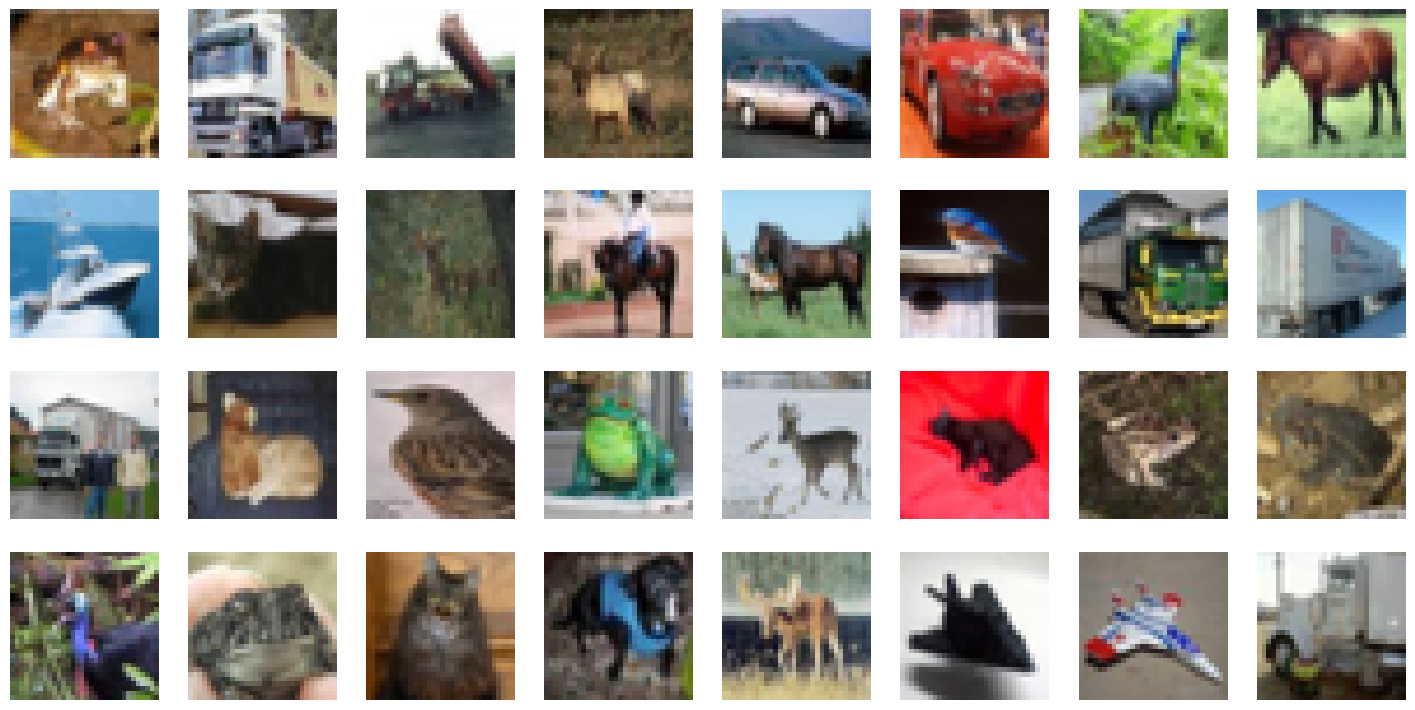

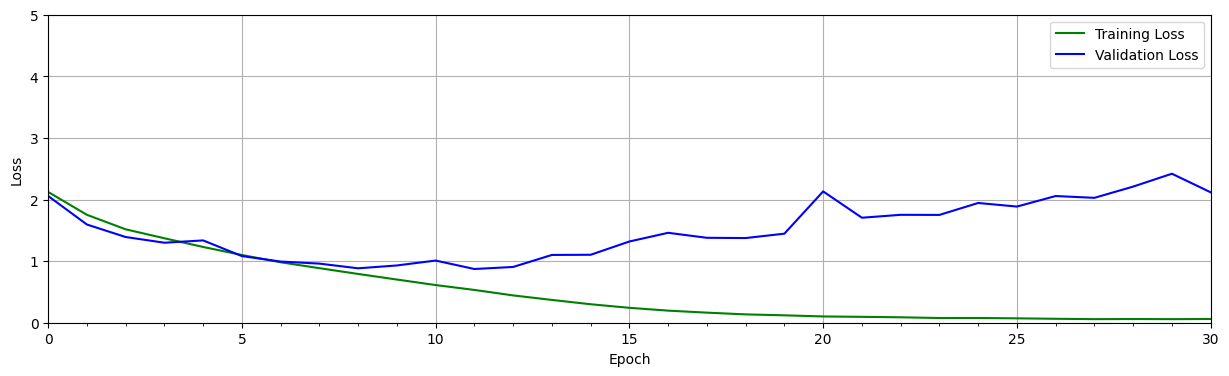

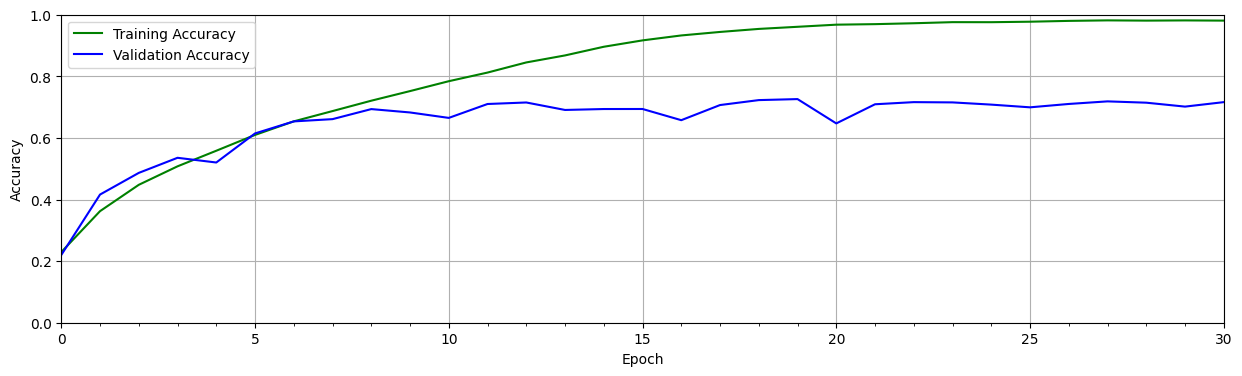

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

SEED_VALUE = 42 # 設定隨機數生成種子值

# 固定種子以使訓練過程可重現
random.seed(SEED_VALUE) # 設定Python的隨機數生成種子
np.random.seed(SEED_VALUE) # 設定NumPy的隨機數生成種子
tf.random.set_seed(SEED_VALUE) # 設定TensorFlow的隨機數生成種子

# 載入CIFAR-10數據集
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# 印出訓練和測試數據的形狀
print(X_train.shape)
print(X_test.shape)
# 繪製訓練數據集中的樣本圖像
plt.figure(figsize=(18, 9))

num_rows = 4
num_cols = 8

# 繪製批次中的每個圖像以及相關的地面實況標籤。
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

# 將圖像數據正規化到[0, 1]範圍
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# 將標籤從整數更改為分類數據。
print('Original (integer) label for the first training sample: ', y_train[0])

# 將標籤轉換為 one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

# 定義數據集和訓練配置的數據類別
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

# 定義CNN模型
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.卷積層和最大池化層
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.卷積層和最大池化層
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.卷積層和最大池化層
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.展平和全連接層
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model
# 繪製訓練和驗證指標的函數
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

# 創建並編譯模型
model = cnn_model()
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )
# 訓練模型
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

# 獲取並繪製訓練結果
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

## 修復過擬合的方法： Drop Out

可以從上面驗證時看到在訓練過程產生了過擬合。注意下，經過十個時期的訓練後，驗證的 loss 會增加，而訓練的 loss 會繼續下降。這就代表了過擬和。準確度圖顯示了類似的趨勢，其中驗證準確度在大約 10 個 epoch 後趨於平穩，而隨著訓練的進行，訓練準確度繼續接近 100%。這是訓練神經網絡時的常見問題，發生的原因有多種。原因之一是該模型可以適應訓練數據集的細微差別，特別是當訓練數據集較小時。

為了幫助緩解這個問題，可以採用一種或多種 正則化 策略來幫助模型更好地泛化。正則化技術有助於限制模型的靈活性，使其不會過度擬合訓練數據。

其中有個方法稱為 Dropout，它內置於 Keras 中。Dropout 在 Keras 中可當作一個層，在訓練過程中會隨機丟棄一定百分比的神經元。當在卷積層中使用dropout時，它通常在最大池化層之後使用  ，具有消除特徵圖中一定比例的神經元的效果。當在全連接層之後使用時，全連接層中一定比例的神經元將被丟棄。

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

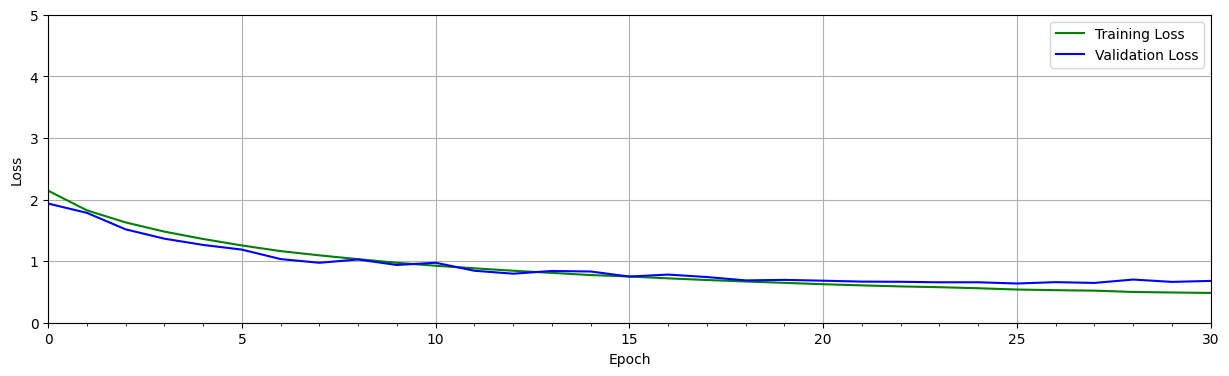

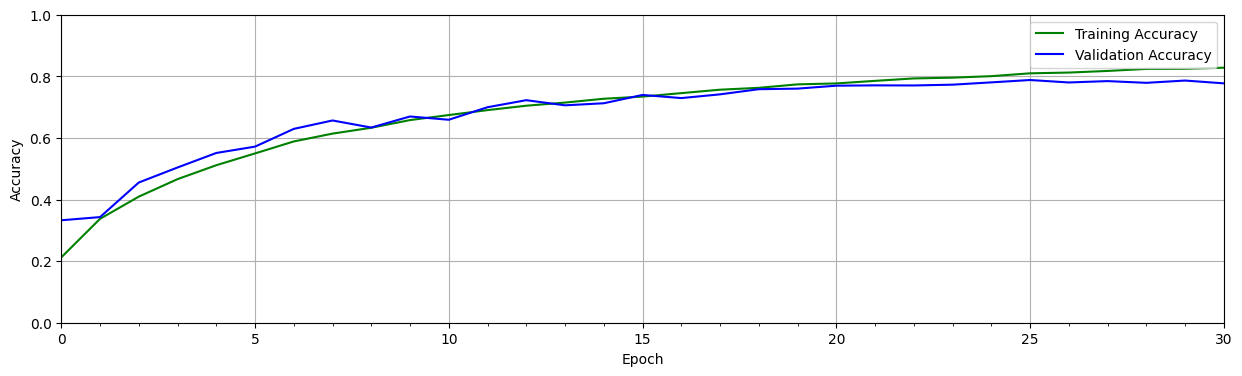

313/313 [==============================] - 1s 4ms/step - loss: 0.6894 - accuracy: 0.7702
Test accuracy: 77.020
1/1 [==============================] - 0s 217ms/step
Prediction accuracy:  0.88


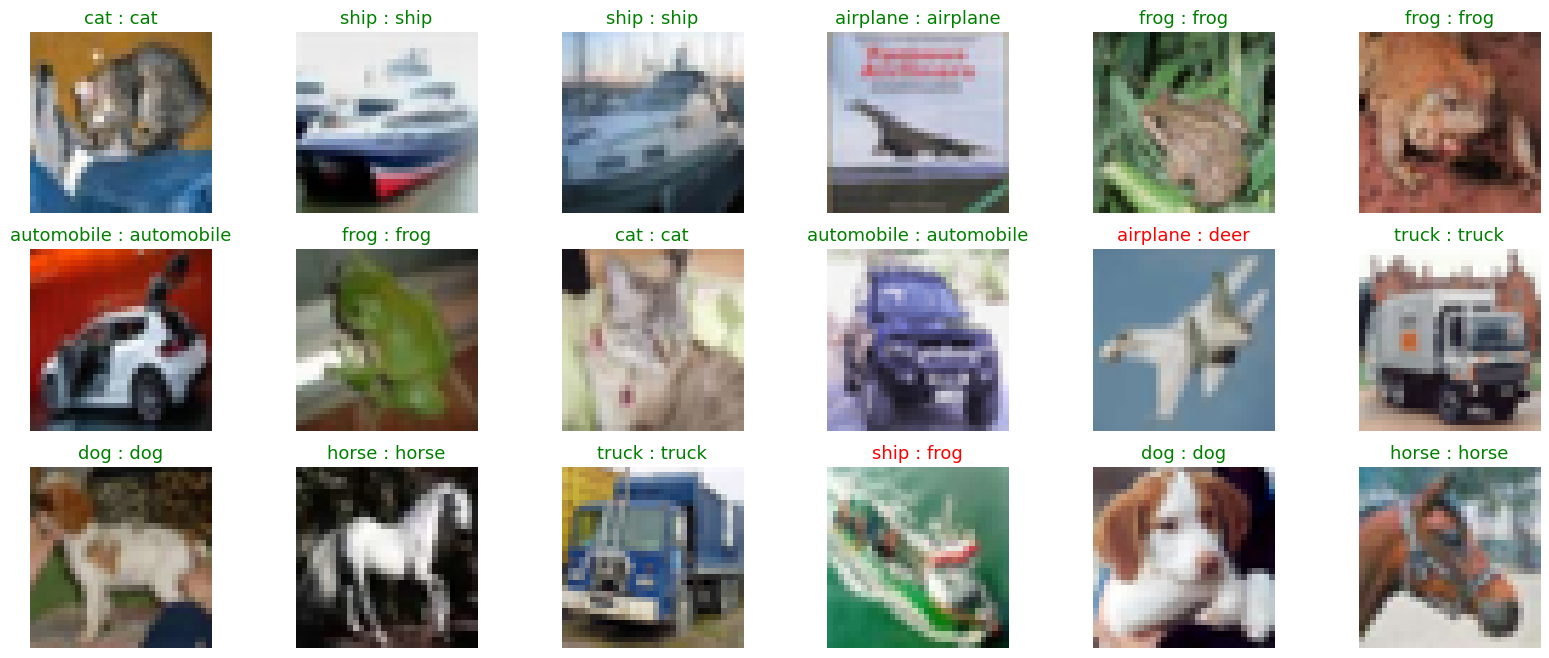

In [ ]:
def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool. 第一個卷積塊：32個過濾器和最大池化
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))# 添加Dropout層以防止過擬合

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Flatten the convolutional features. 展平卷積特徵並添加全連接層
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))# 添加Dropout層以防止過擬合
    model.add(Dense(10, activation='softmax'))# 輸出層，10個類別

    return model
# 創建模型並顯示其結構
model_dropout = cnn_model_dropout()
model_dropout.summary()
# 訓練模型
model_dropout.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'],
                     )

history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

# 獲取訓練結果
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
# 繪製訓練和驗證的損失和準確度
plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])
# 保存模型
model_dropout.save('model_dropout')
# 加載保存的模型
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout')
# 在測試集上評估模型
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")
# 下面的程式碼與上一部分相同
def evaluate_model(dataset, model):

    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')

        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)

    return

evaluate_model(X_test, reloaded_model_dropout)

## 使用 autokeras 挑選模型訓練


下面是使用 autokeras 挑選模型訓練出最準確模型的簡單程式碼 ，雖然很無腦和方便，不過挑選和訓練的時間會明顯數倍於你訓練並調優單個模型的時間。

不過在公司有配置可用的Server或運算資源很多的時候，是一個可選項。

In [ ]:
!pip install autokeras
import numpy as np
import autokeras as ak
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 載入和預處理數據
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

# 初始化AutoKeras的圖像分類器
clf = ak.ImageClassifier(overwrite=True, max_trials=3)

# 使用數據訓練模型
clf.fit(X_train, y_train, epochs=5)

# 評估模型
print('Test accuracy: ', clf.evaluate(X_test, y_test))

Trial 3 Complete [00h 38m 45s]
val_loss: 0.09055786579847336

Best val_loss So Far: 0.09055786579847336
Total elapsed time: 00h 46m 13s
Epoch 1/5
1563/1563 [==============================] - 636s 326ms/step - loss: 0.6159 - accuracy: 0.8097
Epoch 2/5
1563/1563 [==============================] - 510s 326ms/step - loss: 0.1752 - accuracy: 0.9428
Epoch 3/5
1563/1563 [==============================] - 509s 326ms/step - loss: 0.0983 - accuracy: 0.9679
Epoch 4/5
1563/1563 [==============================] - 509s 326ms/step - loss: 0.0556 - accuracy: 0.9824
Epoch 5/5
313/313 [==============================] - 29s 75ms/step - loss: 0.0888 - accuracy: 0.9739
Test accuracy:  [0.08880626410245895, 0.9739000201225281]


# CNN 程式碼(Pytorch)

下面是我覺得很適合用於入門的CNN 程式碼



## pytorch 經典 CNN 程式碼

下面是簡單建立起神經網路,訓練最後驗證的過程

一開始是數據處理，一般來說，當你需要處理圖像、文本、音頻或視頻數據時，
您可以使用標準 python 包將數據加載到 numpy 數組中。
然後你可以將該數組轉換為“torch.*Tensor”。

- 對於圖像，Pillow、OpenCV 等軟件包很有用
- 對於音頻，scipy 和 librosa 等軟件包
- 對於文本，基於原始 Python 或 Cython 的加載，或 NLTK 和 SpaCy 很有用

在電腦視覺方面，pytorch裡有一個名為“torchvision”，這個套件裡有許多常見數的據集，例如 ImageNet、CIFAR10、MNIST 等以及圖像數據轉換器，即
“torchvision.datasets”和“torch.utils.data.DataLoader”。

訓練過程:

1. 使用torchvision下載跟規範化 CIFAR10 訓練和測試數據集
2. 建立跟定義卷積神經網絡
3. 設定損失函數
4. 根據訓練數據訓練網絡
5. 在測試數據上測試網絡


### 使用torchvision下載跟規範化 CIFAR10 訓練和測試數據集

torchvision 數據集的輸出是范圍 [0, 1] 的 PILImage 圖像。
我們將它們轉換為歸一化成範圍 [-1, 1] 的張量。

In [2]:

%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cuda:0


100%|██████████| 170498071/170498071 [00:05<00:00, 28800482.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


這邊只是簡單的show 圖

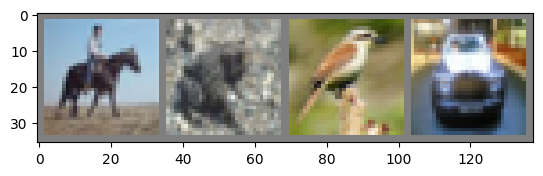

horse frog  bird  car  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 建立模型



In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 除了 batch 外一维化所有維度
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 定義損失函數跟優化器

這邊使用Classification Cross-Entropy loss和具有向量的 SGD。

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 訓練網路

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.196
[1,  4000] loss: 1.811
[1,  6000] loss: 1.660
[1,  8000] loss: 1.587
[1, 10000] loss: 1.517
[1, 12000] loss: 1.455
[2,  2000] loss: 1.403
[2,  4000] loss: 1.356
[2,  6000] loss: 1.348
[2,  8000] loss: 1.303
[2, 10000] loss: 1.284
[2, 12000] loss: 1.265
Finished Training


### 存儲模型

In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 使用 test data 測試

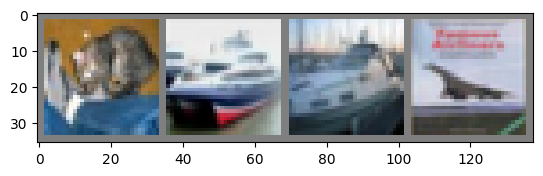

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

載入訓練好的模型

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
outputs = net(images)

In [31]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   dog   car   horse


檢查模型在整個資料集的準確度：

In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


下面是對每個分類的判斷準確度：

In [13]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.4 %
Accuracy for class: car   is 55.3 %
Accuracy for class: bird  is 24.6 %
Accuracy for class: cat   is 32.6 %
Accuracy for class: deer  is 42.2 %
Accuracy for class: dog   is 38.2 %
Accuracy for class: frog  is 66.6 %
Accuracy for class: horse is 75.3 %
Accuracy for class: ship  is 59.3 %
Accuracy for class: truck is 82.1 %


## 使用 optuna 微調模型參數

由於我在colab不能安裝auto-Pytorch，
所以我只能使用optuna自動微調建立起的CNN的超參數並優化，下面是範例程式碼

In [24]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.8 MB/s eta 0:00:00


In [32]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# 數據預處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 加載 CIFAR-10 數據集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# 定義模型
class Net(nn.Module):
    def __init__(self, conv1_out, conv2_out):
        super(Net, self).__init__()
        self.conv1_out = conv1_out
        self.conv2_out = conv2_out  # 將參數存儲為類的屬性
        self.conv1 = nn.Conv2d(3, self.conv1_out, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.conv1_out, self.conv2_out, 5)
        self.fc1 = nn.Linear(self.conv2_out * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.conv2_out * 5 * 5)  # 使用 self.conv2_out
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 定義目標函數
def objective(trial):
    # 超參數建議
    conv1_out = trial.suggest_int('conv1_out', 16, 128)
    conv2_out = trial.suggest_int('conv2_out', 16, 128)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)

    # 建立和訓練模型
    model = Net(conv1_out, conv2_out)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(10):
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # 驗證模型
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# 執行優化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# 結果
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


Files already downloaded and verified
Files already downloaded and verified


[I 2023-09-14 14:56:17,621] A new study created in memory with name: no-name-5f0ebf24-138f-4d90-bc36-11d89bcc462c
[I 2023-09-14 15:05:01,784] Trial 0 finished with value: 0.6447 and parameters: {'conv1_out': 79, 'conv2_out': 114, 'lr': 0.0026463112909692887}. Best is trial 0 with value: 0.6447.
[I 2023-09-14 15:10:56,544] Trial 1 finished with value: 0.7116 and parameters: {'conv1_out': 65, 'conv2_out': 42, 'lr': 0.0006770400480733445}. Best is trial 1 with value: 0.7116.
[I 2023-09-14 15:20:15,176] Trial 2 finished with value: 0.1 and parameters: {'conv1_out': 104, 'conv2_out': 89, 'lr': 0.0702670612642796}. Best is trial 1 with value: 0.7116.
[I 2023-09-14 15:27:47,069] Trial 3 finished with value: 0.1 and parameters: {'conv1_out': 57, 'conv2_out': 124, 'lr': 0.0613437863502188}. Best is trial 1 with value: 0.7116.
[I 2023-09-14 15:38:08,160] Trial 4 finished with value: 0.5855 and parameters: {'conv1_out': 99, 'conv2_out': 125, 'lr': 2.397690194221742e-05}. Best is trial 1 with valu

Number of finished trials:  5
Best trial:
Value:  0.7116
Params: 
    conv1_out: 65
    conv2_out: 42
    lr: 0.0006770400480733445


# 更多更強的CNN 算法

這個 github 裡面有蠻多個在各領域較經典的 CNN 類算法，有興趣的可以看看

[shanglianlm0525/PyTorch-Networks](https://github.com/shanglianlm0525/PyTorch-Networks)